# Instalar Dependencias Necesarias
Importar pandas para manejo de datos, matplotlib y seaborn para visualizaciones, y otras bibliotecas útiles como numpy y wordcloud para análisis de texto.

In [1]:
# Instalar todas las dependencias necesarias

# Instalar pandas
# %pip install pandas

# Instalar matplotlib
# %pip install matplotlib

# Instalar seaborn
# %pip install seaborn

# Instalar numpy
# %pip install numpy

# Instalar wordcloud
# %pip install wordcloud

# Importar Bibliotecas Necesarias
Importar pandas para manejo de datos, matplotlib y seaborn para visualizaciones, y otras bibliotecas útiles como numpy y wordcloud para análisis de texto.

In [2]:
# Importar pandas para manejo de datos
import pandas as pd

# Importar matplotlib para visualizaciones básicas
import matplotlib.pyplot as plt

# Importar seaborn para visualizaciones avanzadas
import seaborn as sns

# Importar numpy para operaciones numéricas
import numpy as np

# Importar WordCloud para generar nubes de palabras
from wordcloud import WordCloud

# Configurar estilo de gráficos de seaborn
sns.set(style="whitegrid")

# Configurar matplotlib para mostrar gráficos en el notebook
%matplotlib inline

# Cargar y Explorar los Datos
Cargar el archivo CSV utilizando pandas, mostrar las primeras filas, información sobre las columnas y estadísticas descriptivas básicas para entender la estructura de los datos.

In [3]:
# Cargar el archivo CSV utilizando pandas
data = pd.read_csv('Catalog_v2.csv')

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(data.head())

Primeras 5 filas del dataset:
  levelType                  code catalogType                  name  \
0  CATEGORY       Street Lighting     PRODUCT       Street Lighting   
1  CATEGORY   Pedestrian Lighting     PRODUCT   Pedestrian Lighting   
2  CATEGORY  Traffic Signal Poles     PRODUCT  Traffic Signal Poles   
3  CATEGORY              Controls     PRODUCT              Controls   
4  CATEGORY            Downlights     PRODUCT            Downlights   

                              description  \
0       Category code for Street Lighting   
1   Category code for Pedestrian Lighting   
2  Category code for Traffic Signal Poles   
3              Category code for Controls   
4            Category code for Downlights   

                                  sourceLink  
0       http://lighttree.com/Street Lighting  
1   http://lighttree.com/Pedestrian Lighting  
2  http://lighttree.com/Traffic Signal Poles  
3              http://lighttree.com/Controls  
4            http://lighttree.com/Dow

# Distribución de Tipos de Nivel (levelType)
Crear gráficos de barras y circulares para visualizar la distribución de los diferentes tipos de nivel (CATEGORY, BRAND, FAMILY, LINE) en el catálogo.

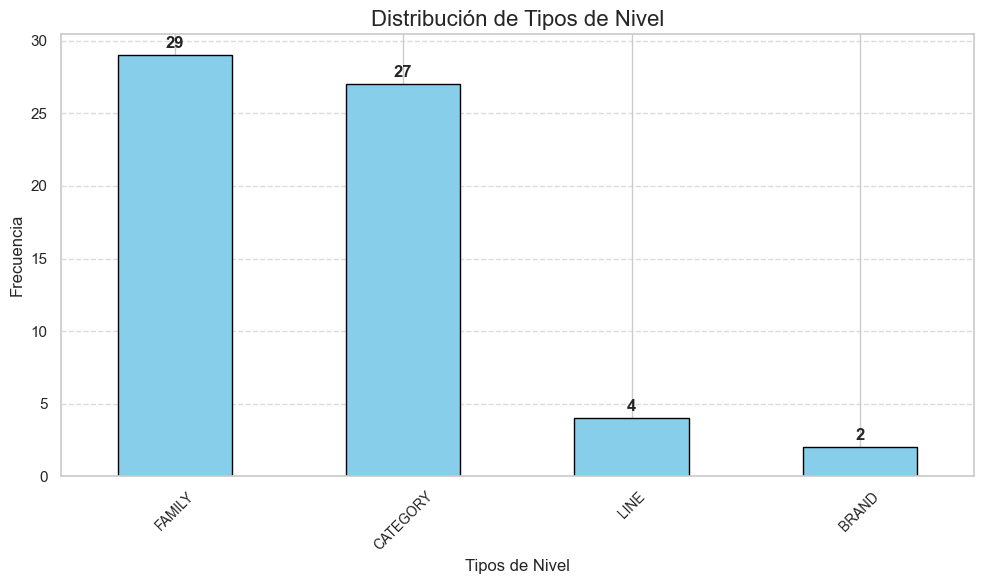

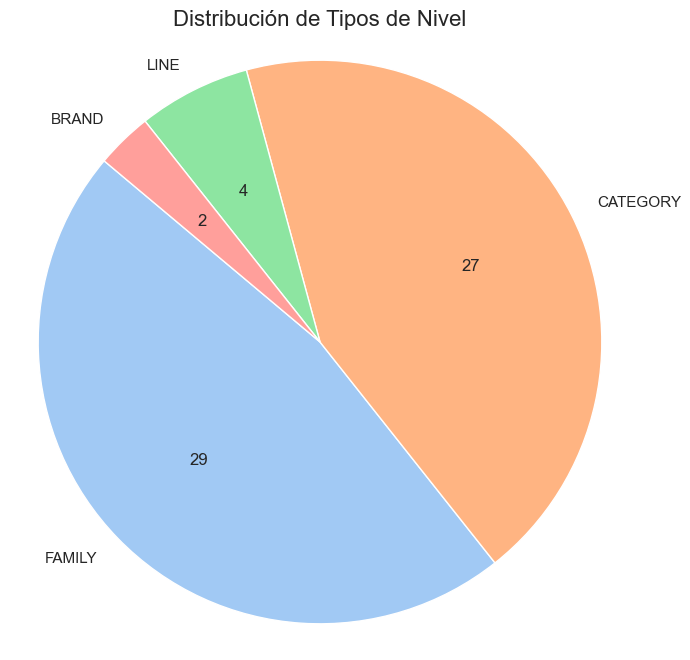


Este gráfico muestra cómo están distribuidos los diferentes niveles jerárquicos 
en nuestro catálogo de productos de iluminación.

Significado de cada tipo de nivel:
• CATEGORY: Representa las categorías principales de productos (iluminación de calle, bombillas, etc.)
• BRAND: Representa las marcas comerciales (Commercial, Public Sector)
• FAMILY: Representa las familias específicas de productos (Cobra Head, Alliance, etc.)
• LINE: Representa líneas de productos dentro de una familia

Distribución observada:
• FAMILY: Es el tipo de nivel más frecuente con 29 ocurrencias (40.3%). 
  Esto indica que el catálogo está muy organizado por familias de productos.
• CATEGORY: Es el segundo tipo más común con 27 ocurrencias (37.5%).
  Muestra una buena diversidad de categorías principales de productos.
• LINE: Tiene solo 4 ocurrencias (5.6%).
  Sugiere que pocas familias se subdividen en líneas específicas.
• BRAND: Es el tipo menos frecuente con apenas 2 ocurrencias (2.8%).
  Indica que los pr

In [4]:
# 1. Contamos cuántas veces aparece cada tipo de nivel en los datos
level_type_counts = data['levelType'].value_counts()

# 2. Creamos un gráfico de barras
plt.figure(figsize=(10, 6))  # Definimos el tamaño del gráfico (ancho x alto)
ax = level_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # Dibujamos barras azules con borde negro

# 3. Añadimos el número exacto sobre cada barra
for i, v in enumerate(level_type_counts):  # Para cada barra (i=posición, v=valor)
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')  # Texto en posición i, ligeramente por encima de la barra

# 4. Personalizamos el gráfico
plt.title('Distribución de Tipos de Nivel', fontsize=16)  # Título grande
plt.xlabel('Tipos de Nivel', fontsize=12)  # Etiqueta eje X
plt.ylabel('Frecuencia', fontsize=12)  # Etiqueta eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotamos las etiquetas para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadimos líneas de guía horizontales
plt.tight_layout()  # Ajustamos márgenes automáticamente
plt.show()  # Mostramos el gráfico de barras

# 5. Creamos un gráfico circular (pastel)
plt.figure(figsize=(8, 8))  # Nuevo gráfico cuadrado

# 6. Función para mostrar solo el número exacto (sin porcentaje)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)  # Total de todos los valores
        val = int(round(pct*total/100.0))  # Calculamos el valor exacto a partir del porcentaje
        return '{}'.format(val)  # Devolvemos solo el número
    return my_autopct

# 7. Dibujamos el gráfico de pastel
plt.pie(level_type_counts,  # Datos a representar
        labels=level_type_counts.index,  # Etiquetas (FAMILY, CATEGORY, etc.)
        autopct=make_autopct(level_type_counts),  # Usamos nuestra función para mostrar números exactos
        startangle=140,  # Ángulo de inicio
        colors=sns.color_palette("pastel"))  # Usamos colores pastel de seaborn

plt.title('Distribución de Tipos de Nivel', fontsize=16)  # Título
plt.axis('equal')  # Aseguramos que el círculo se vea como círculo
plt.show()  # Mostramos el gráfico de pastel

# 8. Imprimimos la explicación detallada
print("""
Este gráfico muestra cómo están distribuidos los diferentes niveles jerárquicos 
en nuestro catálogo de productos de iluminación.

Significado de cada tipo de nivel:
• CATEGORY: Representa las categorías principales de productos (iluminación de calle, bombillas, etc.)
• BRAND: Representa las marcas comerciales (Commercial, Public Sector)
• FAMILY: Representa las familias específicas de productos (Cobra Head, Alliance, etc.)
• LINE: Representa líneas de productos dentro de una familia

Distribución observada:
• FAMILY: Es el tipo de nivel más frecuente con 29 ocurrencias (40.3%). 
  Esto indica que el catálogo está muy organizado por familias de productos.
• CATEGORY: Es el segundo tipo más común con 27 ocurrencias (37.5%).
  Muestra una buena diversidad de categorías principales de productos.
• LINE: Tiene solo 4 ocurrencias (5.6%).
  Sugiere que pocas familias se subdividen en líneas específicas.
• BRAND: Es el tipo menos frecuente con apenas 2 ocurrencias (2.8%).
  Indica que los productos están agrupados bajo muy pocas marcas comerciales.

Esta distribución sugiere una estructura de catálogo donde los productos están 
principalmente organizados por familias y categorías, con pocas marcas generales.
""")

# Distribución de Tipos de Catálogo (catalogType)
Analizar y visualizar la distribución de tipos de catálogo (PRODUCT, ITEM) mediante gráficos comparativos.

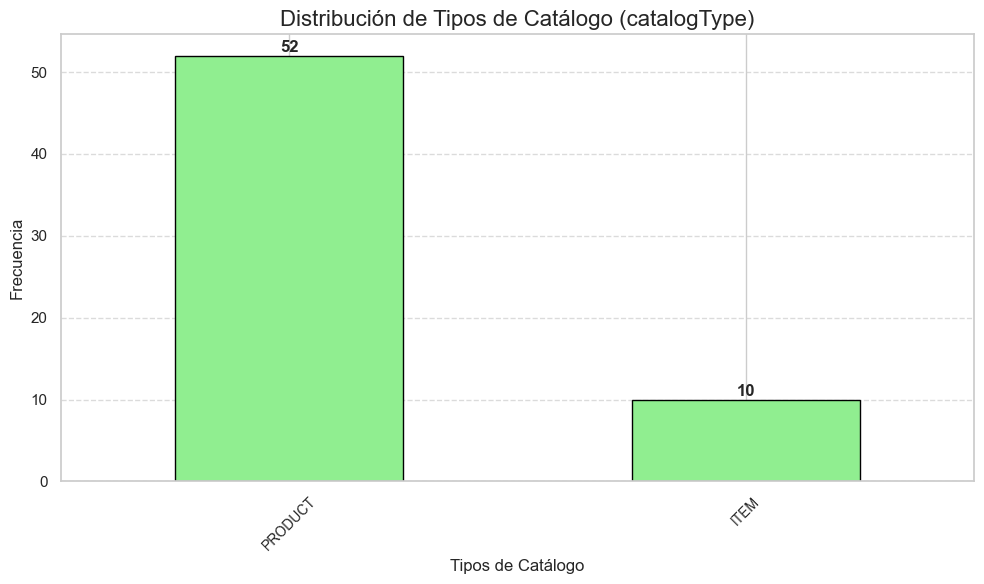

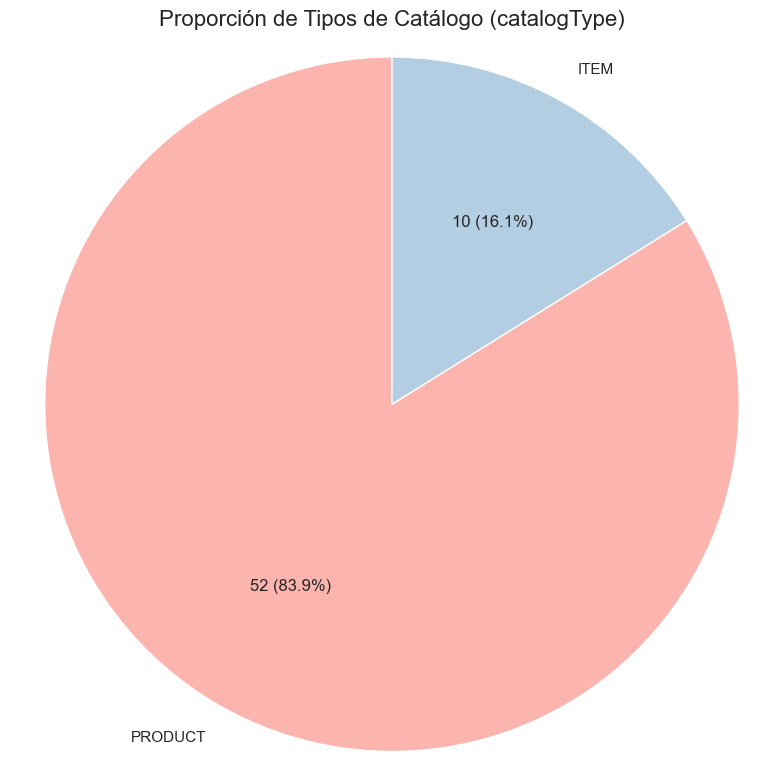


Análisis de Tipos de Catálogo (catalogType)
-------------------------------------------

Este análisis muestra cómo se distribuyen los elementos entre los dos tipos principales de catálogo 
en nuestro sistema de productos de iluminación.

Contexto del catálogo:
• PRODUCT: Son elementos completos que se pueden vender directamente como unidades de iluminación
          (ejemplos: luminarias de calle, postes de señales de tráfico, sistemas de control)
• ITEM: Son componentes o partes individuales que se utilizan en la fabricación o mantenimiento
       (ejemplos: bombillas, lentes, chasis, controladores)

Lo que muestran los gráficos:
• El gráfico de barras muestra el número exacto de cada tipo de catálogo
• El gráfico circular muestra la proporción entre ambos tipos

Observaciones principales:

• Los elementos de tipo 'PRODUCT' representan la mayoría del catálogo con 52 entradas (83.9%).
• Los elementos de tipo 'ITEM' representan 10 entradas (16.1%).

• La predominancia de PRODUCTS indi

In [5]:
# 1. Contamos cuántas veces aparece cada tipo de catálogo en los datos
catalog_type_counts = data['catalogType'].value_counts()

# 2. Creamos un gráfico de barras
plt.figure(figsize=(10, 6))  # Definimos el tamaño del gráfico (ancho x alto)
ax = catalog_type_counts.plot(kind='bar', color='lightgreen', edgecolor='black')  # Dibujamos barras verdes con borde negro

# 3. Añadimos el número exacto sobre cada barra
for i, v in enumerate(catalog_type_counts):  # Para cada barra (i=posición, v=valor)
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')  # Texto en posición i, ligeramente por encima de la barra

# 4. Personalizamos el gráfico
plt.title('Distribución de Tipos de Catálogo (catalogType)', fontsize=16)  # Título grande
plt.xlabel('Tipos de Catálogo', fontsize=12)  # Etiqueta eje X
plt.ylabel('Frecuencia', fontsize=12)  # Etiqueta eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotamos las etiquetas para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadimos líneas de guía horizontales
plt.tight_layout()  # Ajustamos márgenes automáticamente
plt.show()  # Mostramos el gráfico de barras

# 5. Creamos un gráfico circular (pastel)
plt.figure(figsize=(8, 8))  # Nuevo gráfico cuadrado

# 6. Función para mostrar valores exactos y porcentajes en el gráfico circular
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)  # Total de todos los valores
        val = int(round(pct*total/100.0))  # Calculamos el valor exacto a partir del porcentaje
        return '{v} ({p:.1f}%)'.format(v=val, p=pct)  # Mostramos valor y porcentaje
    return my_autopct

# 7. Dibujamos el gráfico de pastel
plt.pie(catalog_type_counts,  # Datos a representar
        labels=catalog_type_counts.index,  # Etiquetas (tipos de catálogo)
        autopct=make_autopct(catalog_type_counts),  # Usamos nuestra función para mostrar números y porcentajes
        startangle=90,  # Ángulo de inicio
        colors=plt.cm.Pastel1.colors)  # Usamos colores pastel

plt.title('Proporción de Tipos de Catálogo (catalogType)', fontsize=16)  # Título
plt.axis('equal')  # Aseguramos que el círculo se vea como círculo
plt.tight_layout()  # Ajustamos márgenes
plt.show()  # Mostramos el gráfico de pastel

# 8. Imprimimos la explicación detallada
print("""
Análisis de Tipos de Catálogo (catalogType)
-------------------------------------------

Este análisis muestra cómo se distribuyen los elementos entre los dos tipos principales de catálogo 
en nuestro sistema de productos de iluminación.

Contexto del catálogo:
• PRODUCT: Son elementos completos que se pueden vender directamente como unidades de iluminación
          (ejemplos: luminarias de calle, postes de señales de tráfico, sistemas de control)
• ITEM: Son componentes o partes individuales que se utilizan en la fabricación o mantenimiento
       (ejemplos: bombillas, lentes, chasis, controladores)

Lo que muestran los gráficos:
• El gráfico de barras muestra el número exacto de cada tipo de catálogo
• El gráfico circular muestra la proporción entre ambos tipos

Observaciones principales:
""")

# Generamos automáticamente observaciones sobre los datos
max_type = catalog_type_counts.idxmax()
min_type = catalog_type_counts.idxmin()
total = catalog_type_counts.sum()

print(f"• Los elementos de tipo '{max_type}' representan la mayoría del catálogo con {catalog_type_counts[max_type]} entradas ({catalog_type_counts[max_type]/total*100:.1f}%).")
print(f"• Los elementos de tipo '{min_type}' representan {catalog_type_counts[min_type]} entradas ({catalog_type_counts[min_type]/total*100:.1f}%).")

if max_type == 'PRODUCT':
    print("""
• La predominancia de PRODUCTS indica que nuestro catálogo está más orientado a unidades completas 
  de iluminación que a componentes individuales.
• Esto sugiere un enfoque comercial dirigido principalmente a consumidores finales o instaladores, 
  más que a fabricantes o servicios de reparación.""")
else:
    print("""
• La predominancia de ITEMS indica que nuestro catálogo está más orientado a componentes individuales 
  que a unidades completas.
• Esto sugiere un enfoque comercial dirigido principalmente a fabricantes, servicios de mantenimiento 
  o reparación.""")